<a href="https://colab.research.google.com/github/mikedcurry/DS-Unit-2-Kaggle-Challenge/blob/master/Curry_224_assignment_kaggle_challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 4

## Catch up, if needed
- [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2/portfolio-project/ds6), then choose your dataset, and [submit this form](https://forms.gle/nyWURUg65x1UTRNV9), due yesterday at 3:59pm Pacific.
- Submit predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file.) The competition closes today at 3:59pm. Every student should make at least one submission that scores at least 60% accuracy (above the majority class baseline).

## Assignment
- [ ] Continue to participate in our Kaggle challenge. 
- [ ] Use scikit-learn for hyperparameter optimization with RandomizedSearchCV.
- [ ] Submit your final predictions to our Kaggle competition. Optionally, go to **My Submissions**, and _"you may select up to 1 submission to be used to count towards your final leaderboard score."_ The competition closes today at 3:59pm.
- [ ] Add comments and Markdown to your notebook. Clean up your code.
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Reading
- Jake VanderPlas, [Python Data Science Handbook, Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), Hyperparameters and Model Validation
- Jake VanderPlas, [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=107)
- Ron Zacharski, [A Programmer's Guide to Data Mining, Chapter 5](http://guidetodatamining.com/chapter5/), 10-fold cross validation
- Sebastian Raschka, [A Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb)
- Peter Worcester, [A Comparison of Grid Search and Randomized Search Using Scikit Learn](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

### Doing
- Try combining xgboost early stopping, cross-validation, & hyperparameter optimization, with [the "original" (non scikit-learn) xgboost API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.cv).
- In additon to `RandomizedSearchCV`, scikit-learn has [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Another library called scikit-optimize has [`BayesSearchCV`](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html). Experiment with these alternatives.
- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?

#### Try stacking multiple submissions!

Here's some code you can use:

```python
import pandas as pd

# Filenames of your submissions you want to ensemble
files = ['submission-01.csv', 'submission-02.csv', 'submission-03.csv']

target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)
```

In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # eli5, version >= 0.9
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders eli5 pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module3')

     |████████████████████████████████| 92kB 3.5MB/s 
     |████████████████████████████████| 102kB 25.5MB/s 
     |████████████████████████████████| 133kB 37.4MB/s 
     |████████████████████████████████| 7.1MB 37.8MB/s 
     |████████████████████████████████| 614kB 39.7MB/s 
     |████████████████████████████████| 225kB 42.8MB/s 
     |████████████████████████████████| 768kB 42.4MB/s 
     |████████████████████████████████| 194kB 48.3MB/s 
     |████████████████████████████████| 51kB 16.3MB/s 
     |████████████████████████████████| 737kB 38.4MB/s 
     |████████████████████████████████| 51kB 15.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145036 sha256=cfbb467141f72b89fc80d40f347bbf3e397e5452a6775ffc162cf63de7936ad1
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=d0904c2269eedf32d

In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')


# Split train into train & val
# train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
#                               stratify=train['status_group'], random_state=42)


def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    X['amount_tsh'] = X['amount_tsh'].round(3)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    # Also create a "missing indicator" column, because the fact that
    # values are missing may be a predictive signal.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                       'gps_height', 'population', '']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col+'_MISSING'] = X[col].isnull()
    
    # Drop duplicate columns
    duplicates = ['quantity_group', 'payment_type']
    X = X.drop(columns=duplicates)
    
    # Drop recorded_by (never varies) and id (always varies, random)
    unusable_variance = ['recorded_by', 'id']
    X = X.drop(columns=unusable_variance)
    
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
   
    # Engineer feature: how many years from construction_year to date_recorded
    X['pump_age'] = X['year_recorded'] - X['construction_year']
    X['pump_age_MISSING'] = X['pump_age'].isnull()
    

    
    # return the wrangled dataframe
    return X

train = wrangle(train)
#val = wrangle(val)
test = wrangle(test)

KeyError: ignored

In [0]:
# Arrange data into X features matrix and y target vector

target = 'status_group'

X_train = train.drop(columns=target)
y_train = train[target]

# X_val = val.drop(columns=target)
# y_val = val[target]

X_test = test

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [93]:
# My best scoring Model so far...

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=450, random_state=42, n_jobs=-1,
                          max_depth=65, max_leaf_nodes=3500)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.812037037037037


In [14]:
import pandas_profiling
train.profile_report()

## Optimizing Hyperparameters

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve


In [0]:
from sklearn.metrics import mean_absolute_error

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import Ridge               #?
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [22]:
# 1st looking at k-folds = 3, for educational purposes

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=145, n_jobs=-1, random_state=42)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k)      # letting the function run default scoring parameters                   
print(f'MAE for {k} folds:', scores)

MAE for 3 folds: [0.7971847  0.80440684 0.79979797]


In [23]:
# Great way to inspect what hyperparameters you can tweak:

print('Model Hyperparameters:')
print(pipeline.named_steps['randomforestclassifier'])

Model Hyperparameters:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=145,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [0]:
# More Educational purpose stuff: Validation Curve...
from sklearn.model_selection import validation_curve

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

depth = range(1, 20 , 3)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='randomforestclassifier__max_depth',         # Reaching inside of the pipeline at named step, max_depth parameter
    param_range=depth,
    cv=3,
    n_jobs=-1
)

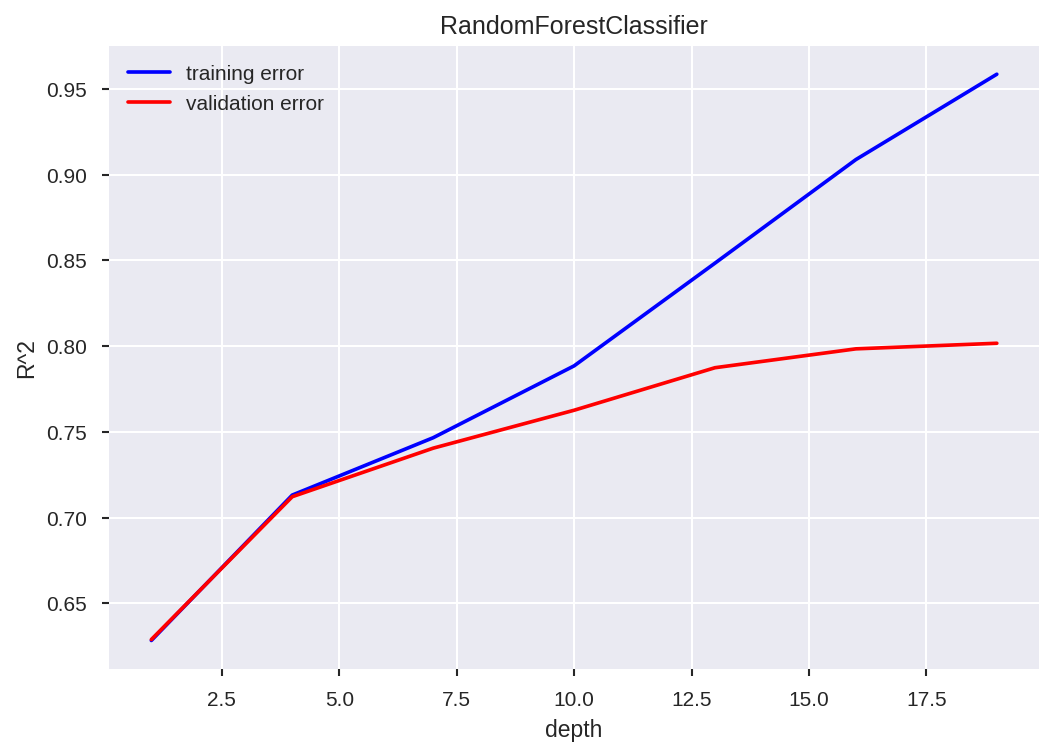

In [35]:
plt.figure(dpi=150)
plt.plot(depth, np.mean(train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(val_scores, axis=1), color='red', label='validation error')
plt.xlabel('depth')
plt.ylabel('R^2')
plt.title('RandomForestClassifier')
plt.legend();

In [0]:
# More Educational purpose stuff: Validation Curve...
from sklearn.model_selection import validation_curve

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42,
                          max_depth=14)
)

depth = range(100, 400 , 25)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='randomforestclassifier__max_leaf_nodes',         # Reaching inside of the pipeline at named step, max_depth parameter
    param_range=depth,
    cv=3,
    n_jobs=-1
)

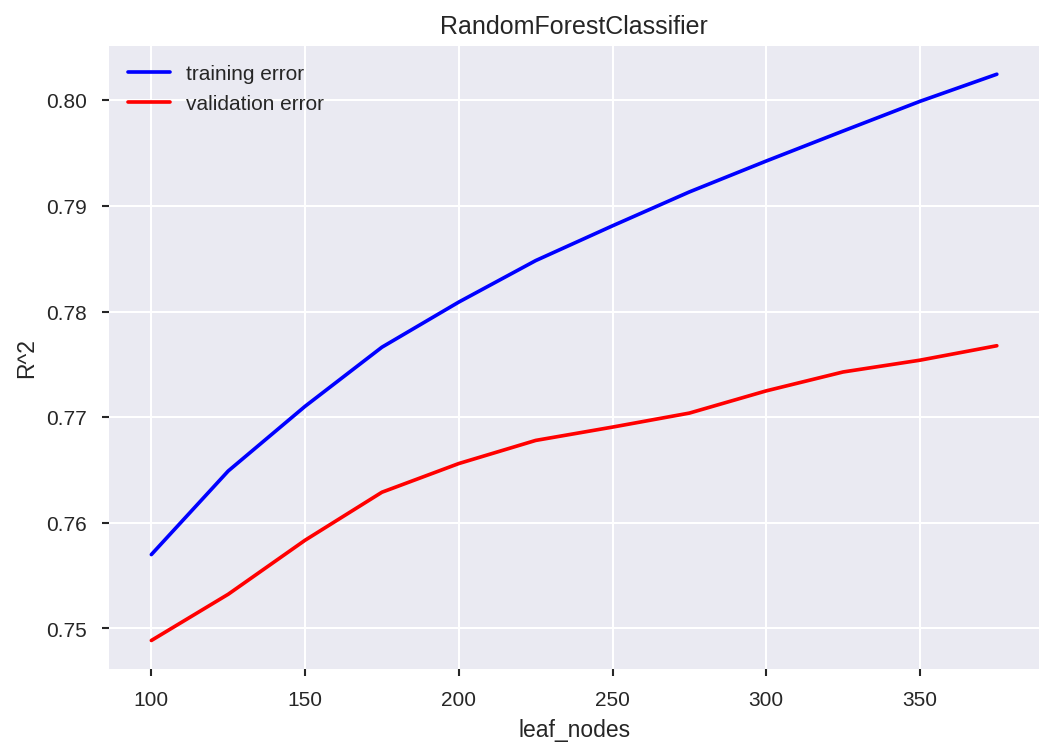

In [51]:
plt.figure(dpi=150)
plt.plot(depth, np.mean(train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(val_scores, axis=1), color='red', label='validation error')
plt.xlabel('leaf_nodes')
plt.ylabel('R^2')
plt.title('RandomForestClassifier')
plt.legend();

In [36]:
# Looking at this again...

print('Model Hyperparameters:')
print(pipeline.named_steps['randomforestclassifier'])

Model Hyperparameters:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [60]:


pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'randomforestclassifier__n_estimators': randint(200, 500), 
    'randomforestclassifier__max_depth': randint(40,90)         
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3,  
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.1min finished


In [61]:
print('Best hyperparameters:', search.best_params_)
print('Cross-validation Score:', search.best_score_)

Best hyperparameters: {'randomforestclassifier__max_depth': 63, 'randomforestclassifier__n_estimators': 481, 'simpleimputer__strategy': 'median'}
Cross-validation Score: 0.8021254208754208


In [64]:
# For XGBoost hyperparameters
from xgboost import XGBClassifier

print('Model Hyperparameters:')
print(pipeline.named_steps['xgbclassifier'])

Model Hyperparameters:


KeyError: ignored

In [0]:
 from scipy import stats
 from scipy.stats import randint
 from sklearn.model_selection import RandomizedSearchCV
 from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score

In [97]:
from xgboost import XGBClassifier

# Running it on original set
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(random_state=42)
)

param_distributions = {'n_estimators': randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }


search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter = 25, 
  #  scoring = 'roc_auc', 
    error_score = 0, 
    verbose = 5, 
    n_jobs = -1
)
    

search.fit(X_train, y_train);


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


ValueError: ignored